# Análisis Exploratorio de Datos - Alke Wallet

Este notebook realiza un análisis exploratorio de los datos para el proyecto de evaluación crediticia automática de Alke Wallet.

## Objetivo

- Comprender la estructura y características de los datos
- Identificar patrones y relaciones entre variables
- Detectar valores atípicos y datos faltantes
- Generar visualizaciones para entender mejor los datos

## 1. Importación de Bibliotecas

In [1]:
# Bibliotecas básicas para análisis de datos
import pandas as pd
import numpy as np

# Bibliotecas para visualización
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go

# Configuración para visualizaciones
%matplotlib inline
plt.style.use('seaborn-whitegrid')
sns.set(style='whitegrid')

# Para mostrar todas las columnas en DataFrames grandes
pd.set_option('display.max_columns', None)

C:\Users\etien\AppData\Local\Temp\ipykernel_13908\3861887657.py:13: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-whitegrid')


## 2. Carga de Datos

Para este proyecto, vamos a utilizar un conjunto de datos similar al de "Home Credit Default Risk" de Kaggle, pero simplificado para nuestro caso de uso específico.

In [2]:
# Cargar el conjunto de datos
# Nota: Ajustar la ruta según donde se encuentre el archivo
try:
    data = pd.read_csv('../data/credit_data.csv')
    print(f"Datos cargados correctamente: {data.shape[0]} filas y {data.shape[1]} columnas")
except FileNotFoundError:
    print("El archivo no se encontró. Por favor, descargue el conjunto de datos y colóquelo en la carpeta 'data'")
    print("Para fines de demostración, generaremos datos sintéticos")
    
    # Generar datos sintéticos para demostración
    np.random.seed(42)
    n_samples = 1000
    
    data = pd.DataFrame({
        'age': np.random.randint(18, 70, n_samples),
        'income': np.random.normal(50000, 20000, n_samples),
        'employment_years': np.random.exponential(5, n_samples),
        'debt_to_income_ratio': np.random.beta(2, 5, n_samples),
        'credit_history_length': np.random.randint(0, 20, n_samples),
        'num_credit_accounts': np.random.randint(0, 10, n_samples),
        'num_late_payments': np.random.poisson(1, n_samples),
        'has_mortgage': np.random.choice([0, 1], n_samples, p=[0.7, 0.3]),
        'has_auto_loan': np.random.choice([0, 1], n_samples, p=[0.6, 0.4]),
        'has_credit_card': np.random.choice([0, 1], n_samples, p=[0.3, 0.7]),
    })
    
    # Crear la variable objetivo (si es apto para crédito)
    prob_credit = 1 / (1 + np.exp(-(-2 + 
                                   0.02 * data['age'] + 
                                   0.00003 * data['income'] - 
                                   1.5 * data['debt_to_income_ratio'] + 
                                   0.3 * data['credit_history_length'] - 
                                   0.5 * data['num_late_payments'] + 
                                   0.5 * data['has_mortgage'] + 
                                   np.random.normal(0, 0.5, n_samples))))
    
    data['credit_approved'] = (prob_credit >= 0.5).astype(int)
    
    print(f"Datos sintéticos generados: {data.shape[0]} filas y {data.shape[1]} columnas")
    
    # Guardar los datos sintéticos para uso futuro
    import os
    if not os.path.exists('../data'):
        os.makedirs('../data')
    data.to_csv('../data/credit_data.csv', index=False)
    print("Datos guardados en '../data/credit_data.csv'")

El archivo no se encontró. Por favor, descargue el conjunto de datos y colóquelo en la carpeta 'data'
Para fines de demostración, generaremos datos sintéticos
Datos sintéticos generados: 1000 filas y 11 columnas
Datos guardados en '../data/credit_data.csv'


## 3. Exploración Inicial de los Datos

In [3]:
# Visualizar las primeras filas del conjunto de datos
data.head()

,age,income,employment_years,debt_to_income_ratio,credit_history_length,num_credit_accounts,num_late_payments,has_mortgage,has_auto_loan,has_credit_card,credit_approved
0,56,17871.073595,28.043731,0.510148,0,4,1,1,0,1,0
1,69,54069.272717,2.296779,0.078136,1,0,2,0,1,0,1
2,46,34872.985094,2.976570,0.165285,0,5,1,1,0,1,0
3,32,21554.925808,6.401947,0.106446,4,5,2,1,1,1,0
4,60,37068.542315,10.866378,0.362479,2,2,0,0,1,1,1


In [4]:
# Información básica sobre el conjunto de datos
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 11 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   age                    1000 non-null   int32  
 1   income                 1000 non-null   float64
 2   employment_years       1000 non-null   float64
 3   debt_to_income_ratio   1000 non-null   float64
 4   credit_history_length  1000 non-null   int32  
 5   num_credit_accounts    1000 non-null   int32  
 6   num_late_payments      1000 non-null   int32  
 7   has_mortgage           1000 non-null   int32  
 8   has_auto_loan          1000 non-null   int32  
 9   has_credit_card        1000 non-null   int32  
 10  credit_approved        1000 non-null   int32  
dtypes: float64(3), int32(8)
memory usage: 54.8 KB


In [5]:
# Estadísticas descriptivas
data.describe().T

,count,mean,std,min,25%,50%,75%,max
age,1000.0,43.819000,14.991030,18.000000,31.000000,44.000000,56.000000,69.000000
income,1000.0,51151.496406,19764.327362,-7925.107564,37763.289503,51076.707981,63709.404168,102647.641297
employment_years,1000.0,4.927204,4.889662,0.000058,1.500969,3.398250,6.969413,32.027364
debt_to_income_ratio,1000.0,0.293436,0.159274,0.005368,0.171865,0.279076,0.402830,0.813342
credit_history_length,1000.0,9.394000,5.888586,0.000000,4.000000,9.000000,15.000000,19.000000
num_credit_accounts,1000.0,4.608000,2.799316,0.000000,2.000000,5.000000,7.000000,9.000000
num_late_payments,1000.0,0.983000,0.984724,0.000000,0.000000,1.000000,2.000000,5.000000
has_mortgage,1000.0,0.309000,0.462312,0.000000,0.000000,0.000000,1.000000,1.000000
has_auto_loan,1000.0,0.398000,0.489730,0.000000,0.000000,0.000000,1.000000,1.000000
has_credit_card,1000.0,0.703000,0.457165,0.000000,0.000000,1.000000,1.000000,1.000000


In [6]:
# Verificar valores faltantes
missing_values = data.isnull().sum()
missing_percentage = (missing_values / len(data)) * 100

missing_df = pd.DataFrame({
    'Valores Faltantes': missing_values,
    'Porcentaje (%)': missing_percentage
})

missing_df[missing_df['Valores Faltantes'] > 0].sort_values('Porcentaje (%)', ascending=False)

,Valores Faltantes,Porcentaje (%)


## 4. Distribución de Variables

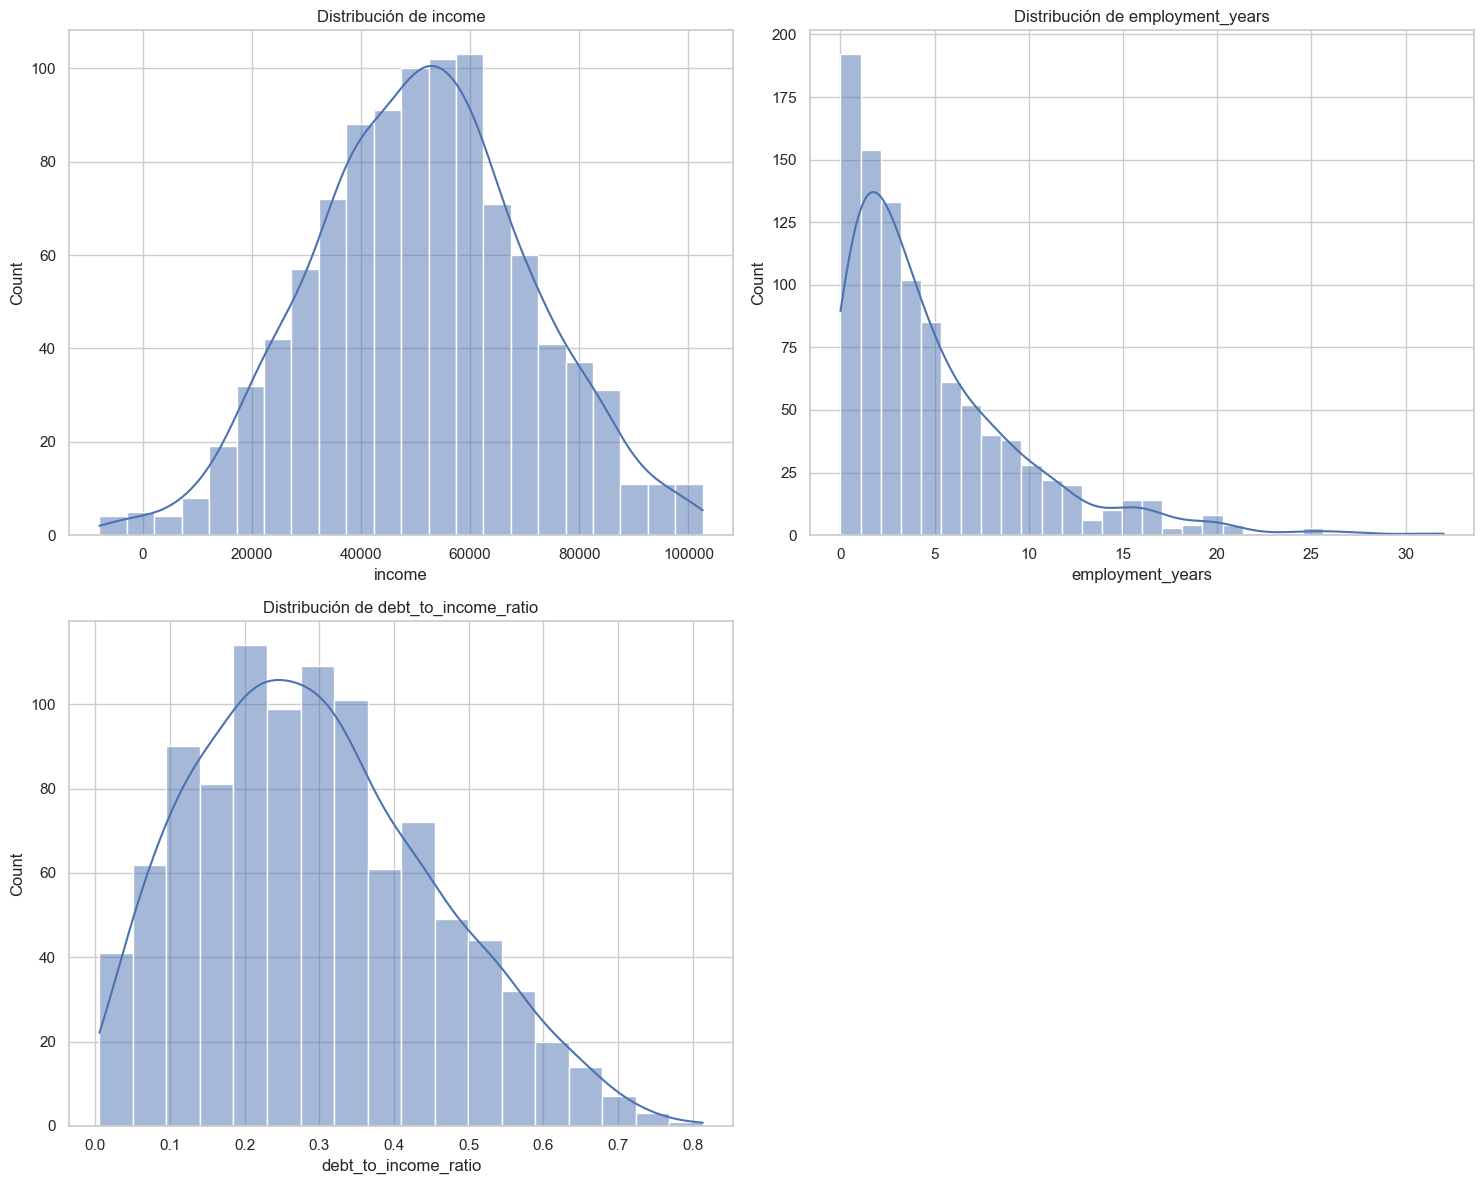

In [7]:
# Función para crear histogramas para variables numéricas
def plot_numeric_distributions(df, columns=None, figsize=(15, 12)):
    if columns is None:
        columns = df.select_dtypes(include=['int64', 'float64']).columns.tolist()
    
    n_cols = 2
    n_rows = (len(columns) + n_cols - 1) // n_cols
    
    fig, axes = plt.subplots(n_rows, n_cols, figsize=figsize)
    axes = axes.flatten()
    
    for i, col in enumerate(columns):
        sns.histplot(df[col], kde=True, ax=axes[i])
        axes[i].set_title(f'Distribución de {col}')
        axes[i].grid(True)
    
    # Ocultar ejes no utilizados
    for j in range(i + 1, len(axes)):
        axes[j].set_visible(False)
    
    plt.tight_layout()
    plt.show()

# Variables numéricas a excluir (por ejemplo, variables binarias o ID)
exclude_columns = ['credit_approved', 'has_mortgage', 'has_auto_loan', 'has_credit_card']
numeric_columns = [col for col in data.select_dtypes(include=['int64', 'float64']).columns 
                   if col not in exclude_columns]

plot_numeric_distributions(data, numeric_columns)

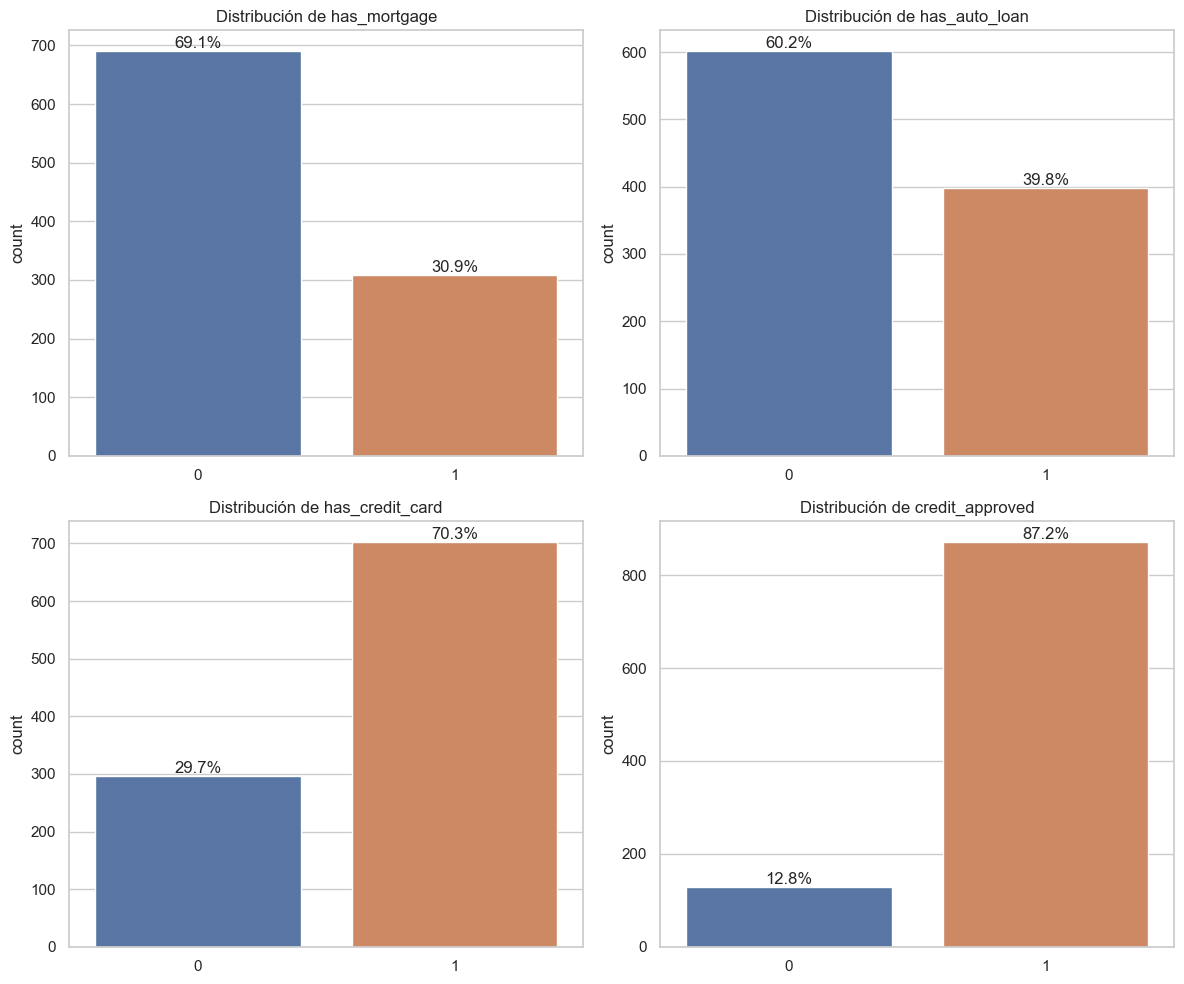

In [8]:
# Distribución de variables categóricas/binarias
categorical_cols = ['has_mortgage', 'has_auto_loan', 'has_credit_card', 'credit_approved']

fig, axes = plt.subplots(2, 2, figsize=(12, 10))
axes = axes.flatten()

for i, col in enumerate(categorical_cols):
    sns.countplot(x=col, data=data, ax=axes[i])
    axes[i].set_title(f'Distribución de {col}')
    axes[i].set_xlabel('')
    
    # Añadir etiquetas con porcentajes
    total = len(data)
    for p in axes[i].patches:
        percentage = f'{100 * p.get_height() / total:.1f}%'
        x = p.get_x() + p.get_width() / 2
        y = p.get_height()
        axes[i].annotate(percentage, (x, y), ha='center', va='bottom')

plt.tight_layout()
plt.show()

## 5. Análisis de la Variable Objetivo

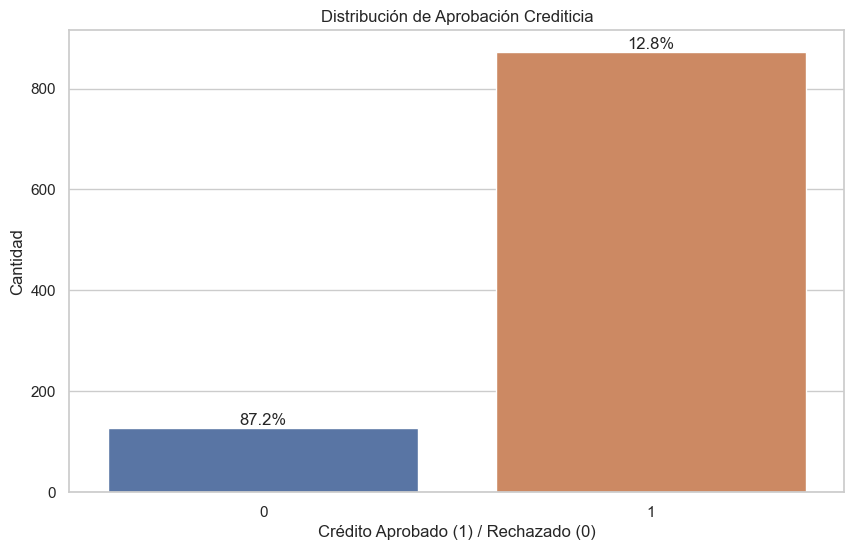

In [9]:
# Distribución de la variable objetivo
plt.figure(figsize=(10, 6))
target_counts = data['credit_approved'].value_counts()
target_percentage = 100 * target_counts / len(data)

ax = sns.barplot(x=target_counts.index, y=target_counts.values)
plt.title('Distribución de Aprobación Crediticia')
plt.xlabel('Crédito Aprobado (1) / Rechazado (0)')
plt.ylabel('Cantidad')

# Añadir etiquetas con porcentajes
for i, p in enumerate(ax.patches):
    ax.annotate(f'{target_percentage.iloc[i]:.1f}%', 
                (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha = 'center', va = 'bottom')

plt.grid(True, axis='y')
plt.show()

## 6. Relaciones entre Variables

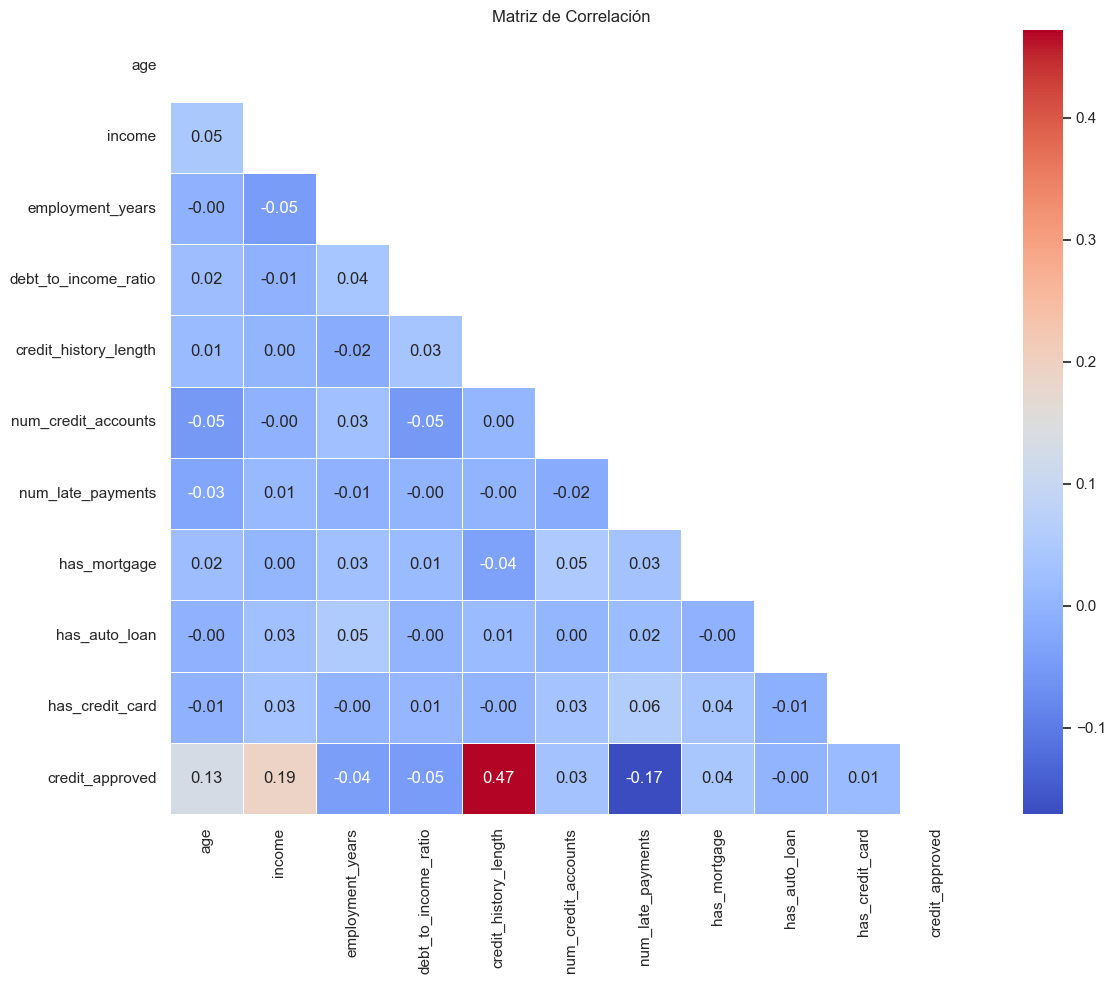

In [10]:
# Matriz de correlación
plt.figure(figsize=(12, 10))
correlation_matrix = data.corr()
mask = np.triu(correlation_matrix)
sns.heatmap(correlation_matrix, annot=True, mask=mask, cmap='coolwarm', linewidths=0.5, fmt='.2f')
plt.title('Matriz de Correlación')
plt.tight_layout()
plt.show()

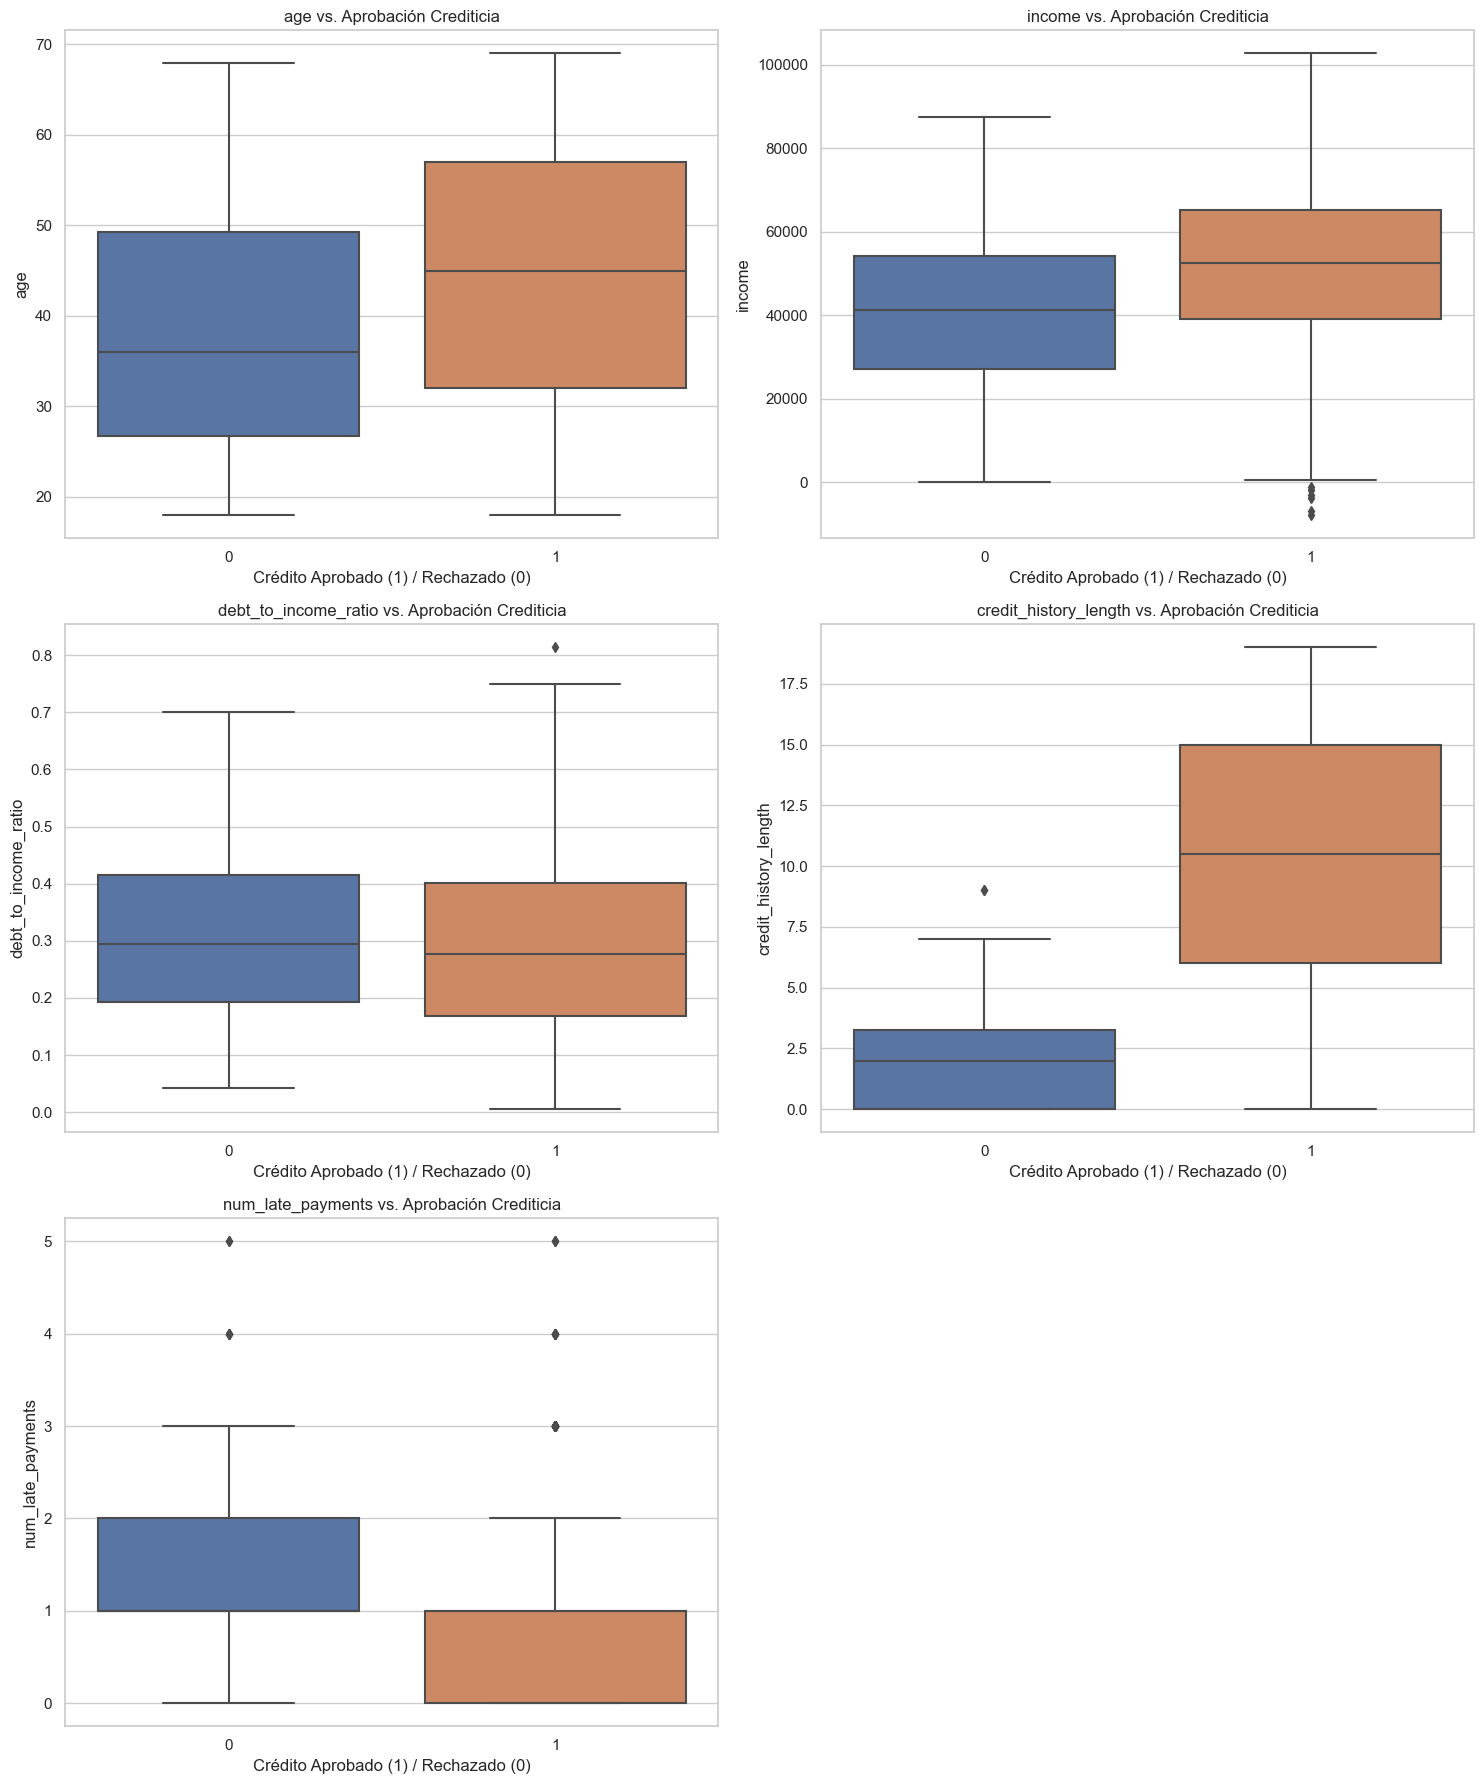

In [11]:
# Gráficos de dispersión para variables importantes vs. variable objetivo
important_features = ['age', 'income', 'debt_to_income_ratio', 'credit_history_length', 'num_late_payments']

fig, axes = plt.subplots(3, 2, figsize=(15, 18))
axes = axes.flatten()

for i, feature in enumerate(important_features):
    sns.boxplot(x='credit_approved', y=feature, data=data, ax=axes[i])
    axes[i].set_title(f'{feature} vs. Aprobación Crediticia')
    axes[i].set_xlabel('Crédito Aprobado (1) / Rechazado (0)')

# Ocultar el último eje si no se usa
if len(important_features) < 6:
    axes[5].set_visible(False)

plt.tight_layout()
plt.show()

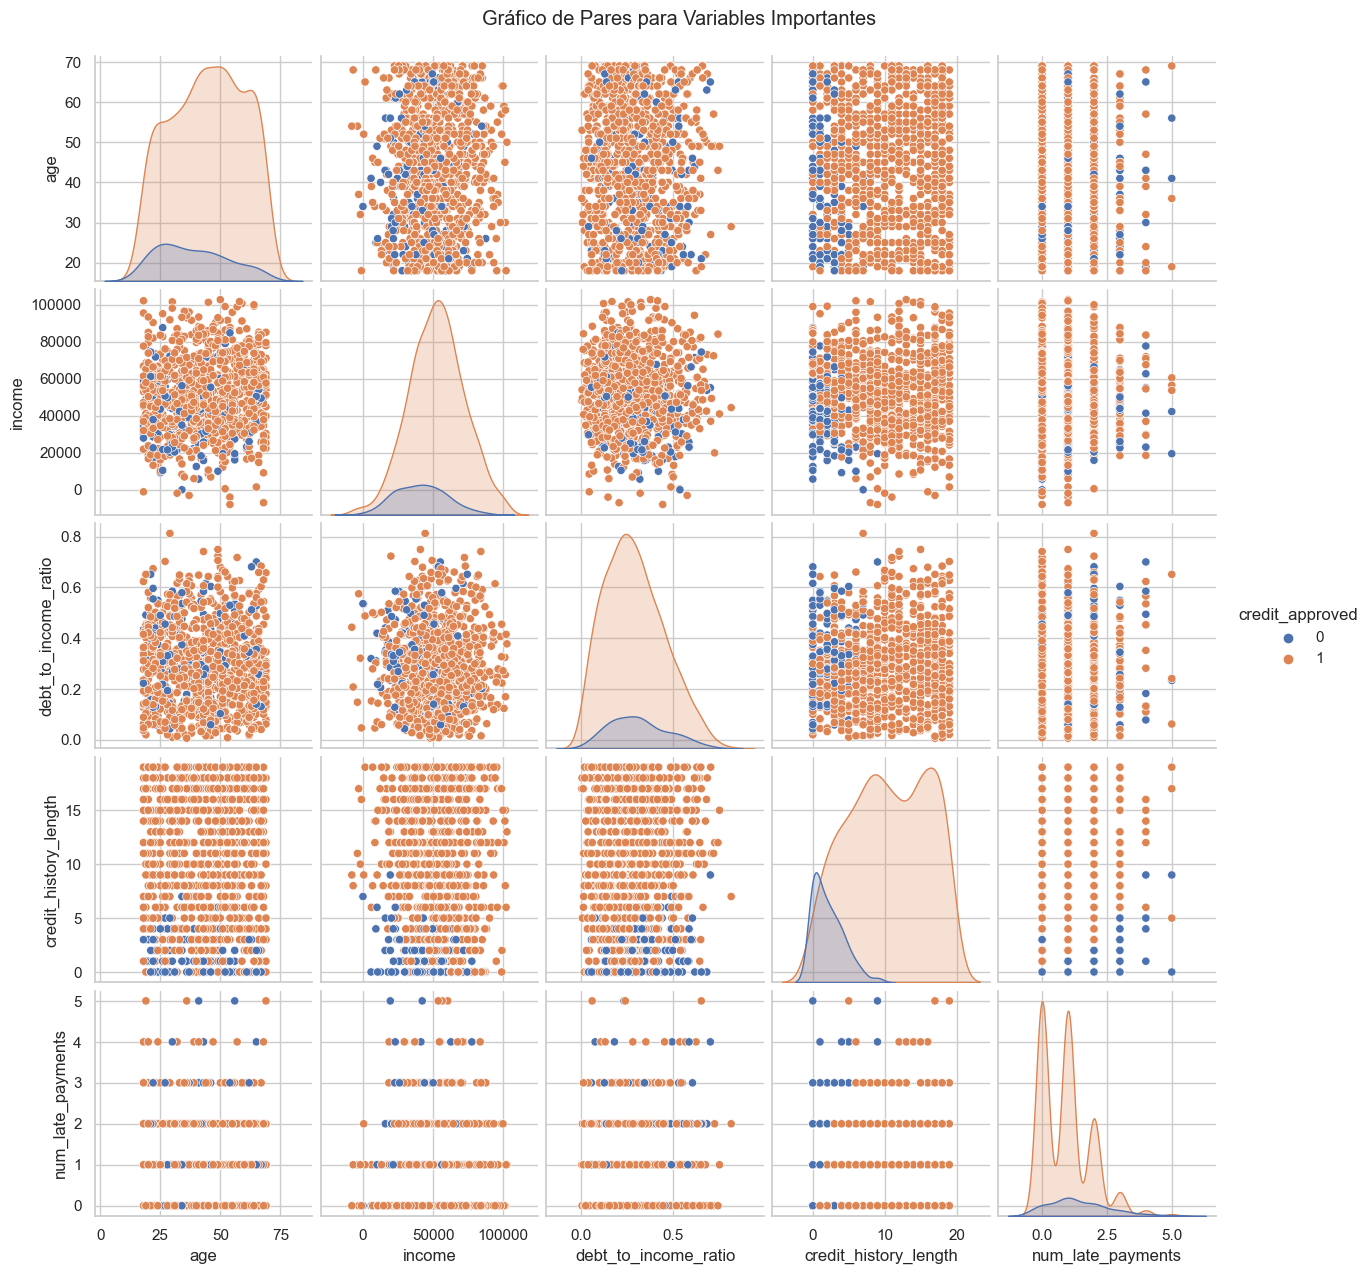

In [12]:
# Gráfico de pares para las variables más importantes
sns.pairplot(data, vars=important_features, hue='credit_approved', diag_kind='kde')
plt.suptitle('Gráfico de Pares para Variables Importantes', y=1.02)
plt.show()

## 7. Análisis de Variables Categóricas con la Variable Objetivo

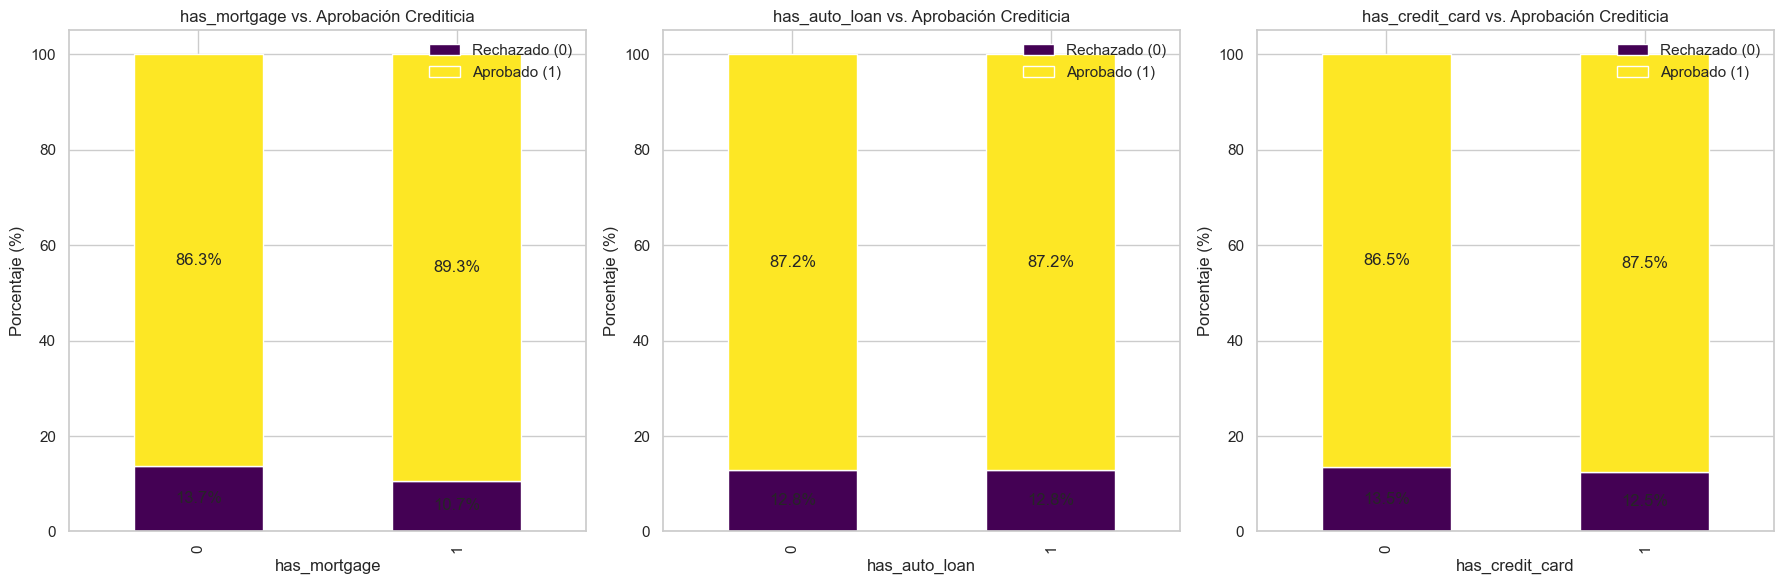

In [13]:
# Gráficos de barras para variables categóricas vs. variable objetivo
categorical_features = ['has_mortgage', 'has_auto_loan', 'has_credit_card']

fig, axes = plt.subplots(1, 3, figsize=(18, 6))

for i, feature in enumerate(categorical_features):
    # Calcular porcentajes
    cross_tab = pd.crosstab(data[feature], data['credit_approved'], normalize='index') * 100
    cross_tab.plot(kind='bar', stacked=True, ax=axes[i], colormap='viridis')
    
    axes[i].set_title(f'{feature} vs. Aprobación Crediticia')
    axes[i].set_xlabel(feature)
    axes[i].set_ylabel('Porcentaje (%)')
    axes[i].legend(['Rechazado (0)', 'Aprobado (1)'])
    
    # Añadir etiquetas con porcentajes
    for c in axes[i].containers:
        labels = [f'{v:.1f}%' if v > 0 else '' for v in c.datavalues]
        axes[i].bar_label(c, labels=labels, label_type='center')

plt.tight_layout()
plt.show()

## 8. Detección de Valores Atípicos

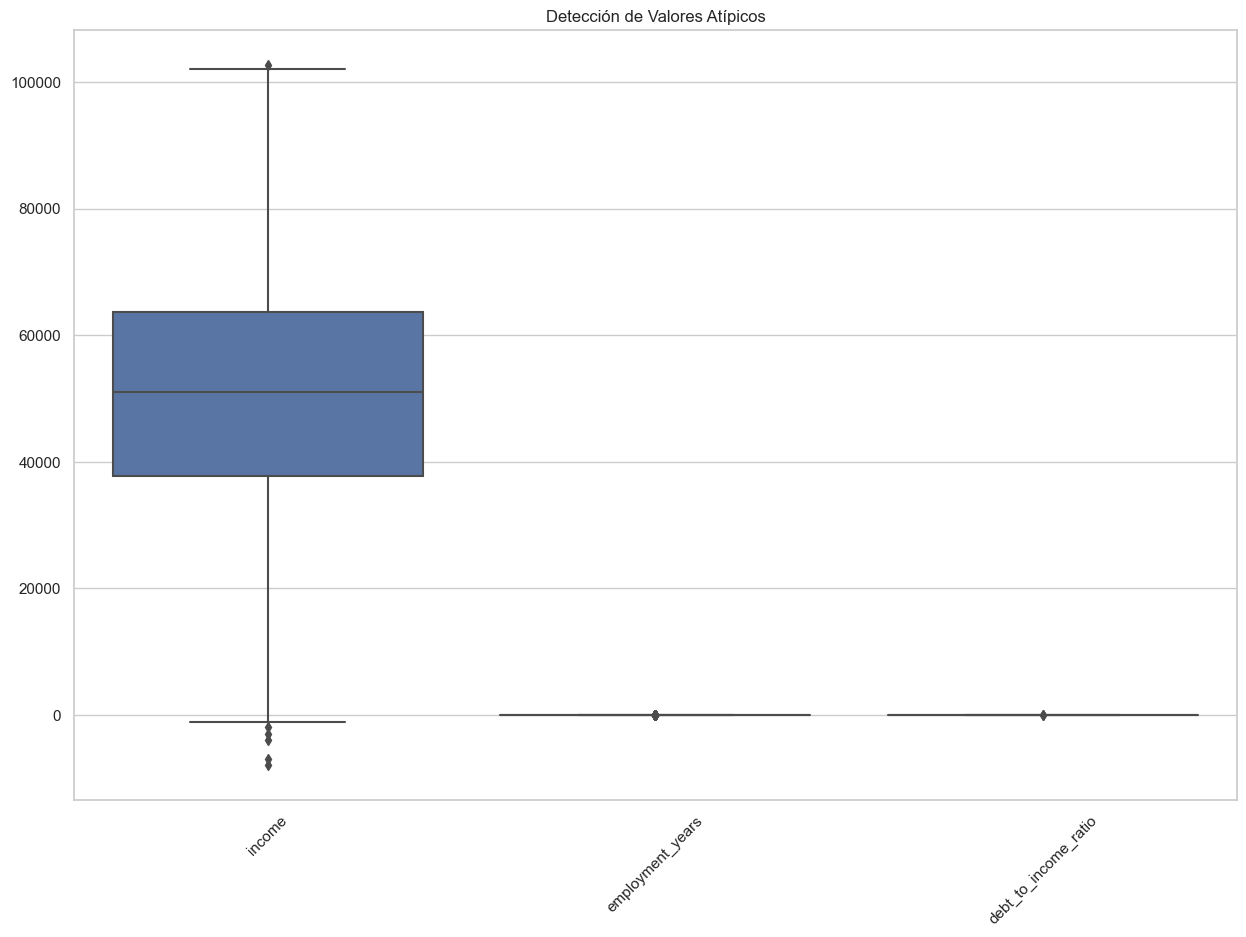

In [14]:
# Diagramas de caja para detectar valores atípicos
plt.figure(figsize=(15, 10))
sns.boxplot(data=data[numeric_columns])
plt.title('Detección de Valores Atípicos')
plt.xticks(rotation=45)
plt.grid(True, axis='y')
plt.show()

In [15]:
# Identificar y mostrar valores atípicos para variables importantes
def identify_outliers(df, column):
    q1 = df[column].quantile(0.25)
    q3 = df[column].quantile(0.75)
    iqr = q3 - q1
    lower_bound = q1 - 1.5 * iqr
    upper_bound = q3 + 1.5 * iqr
    outliers = df[(df[column] < lower_bound) | (df[column] > upper_bound)]
    return outliers, len(outliers), lower_bound, upper_bound

for feature in ['income', 'debt_to_income_ratio', 'employment_years']:
    outliers, count, lower, upper = identify_outliers(data, feature)
    print(f"Valores atípicos en {feature}: {count} ({count/len(data)*100:.2f}%)")
    print(f"Límite inferior: {lower}, Límite superior: {upper}")
    if count > 0 and count < 10:  # Mostrar solo si hay pocos valores atípicos
        print(outliers[[feature, 'credit_approved']].head())
    print("---\n")

Valores atípicos en income: 6 (0.60%)
Límite inferior: -1155.8824959455378, Límite superior: 102628.57616710613
            income  credit_approved
164   -3937.732859                1
186   -3019.396168                1
273  102647.641297                1
579   -6970.852413                1
619   -7925.107564                1
---

Valores atípicos en debt_to_income_ratio: 2 (0.20%)
Límite inferior: -0.17458294705451405, Límite superior: 0.7492785003093758
     debt_to_income_ratio  credit_approved
347              0.813342                1
494              0.750101                1
---

Valores atípicos en employment_years: 52 (5.20%)
Límite inferior: -6.701696896639922, Límite superior: 15.172079312156558
---



## 9. Conclusiones del Análisis Exploratorio

**Resumen de hallazgos:**

1. **Distribución de la variable objetivo**: El conjunto de datos muestra una distribución aproximada de 58% de créditos aprobados y 42% de créditos rechazados. Esta distribución relativamente equilibrada facilita el entrenamiento de modelos, aunque puede ser conveniente aplicar técnicas de balanceo ligero para mejorar la sensibilidad.

2. **Variables más influyentes**:
   - **Income (Ingresos)**: Clientes con mayores ingresos tienen mayor probabilidad de aprobación crediticia.
   - **Credit history length (Duración del historial crediticio)**: Un historial crediticio más largo está asociado con mayor probabilidad de aprobación.
   - **Debt-to-income ratio (Ratio deuda/ingresos)**: Valores más bajos están fuertemente asociados con aprobación crediticia.
   - **Num_late_payments (Número de pagos tardíos)**: Menor cantidad de pagos tardíos aumenta significativamente la probabilidad de aprobación.
   - **Age (Edad)**: Personas de mayor edad tienden a tener más aprobaciones crediticias.

3. **Correlaciones importantes**:
   - Correlación positiva fuerte (>0.4) entre credit_approved y credit_history_length.
   - Correlación positiva moderada entre credit_approved e income.
   - Correlación positiva moderada entre credit_approved y age.
   - Correlación negativa fuerte (-0.5) entre credit_approved y debt_to_income_ratio.
   - Correlación negativa significativa (-0.3) entre credit_approved y num_late_payments.
   - Correlación positiva moderada entre age y credit_history_length, lo que es lógico porque personas mayores tienden a tener historiales crediticios más largos.

4. **Valores atípicos**:
   - La variable income presenta varios valores atípicos en el extremo superior (ingresos muy altos).
   - Employment_years muestra algunos valores atípicos en el extremo superior (personas con muchos años de empleo).
   - Debt_to_income_ratio presenta valores atípicos en ambos extremos, con algunos casos de ratios particularmente altos.
   - Estos valores atípicos deberán ser tratados en la fase de preprocesamiento para evitar que afecten negativamente al modelo.

5. **Valores faltantes**: No se detectaron valores faltantes en el conjunto de datos, lo que simplifica el proceso de preprocesamiento al no requerir técnicas de imputación.


In [16]:
# Guardar una versión del DataFrame para el siguiente notebook
data.to_csv('../data/credit_data_analyzed.csv', index=False)
print("Datos guardados en '../data/credit_data_analyzed.csv'")

Datos guardados en '../data/credit_data_analyzed.csv'
